In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-classifier-dataset/llm_generated_dataset.csv
/kaggle/input/llm-classifier-dataset/llm_generated_dataset_gpt and opt.csv
/kaggle/input/llm-classifier-dataset/llm_generated_dataset_opt_gpt_2.csv
/kaggle/input/llm-classifier-dataset/llm_generated_dataset_falcon_bloom.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv1 = pd.read_csv('/kaggle/input/llm-classifier-dataset/llm_generated_dataset.csv')
csv2 = pd.read_csv('/kaggle/input/llm-classifier-dataset/llm_generated_dataset_gpt and opt.csv')

merged_csv_1 = pd.concat([csv1, csv2], ignore_index=True)

merged_csv_1 = merged_csv_1.sort_values(by='xi', ignore_index=True)


In [4]:
merged_csv_1.count()

xi           2500
xj           2500
LLM_model    2500
dtype: int64

In [5]:
merged_csv_1.head(10)

,xi,xj,LLM_model
0,A sudden noise,A sudden noise from the back of the house.\nI'...,OPT
1,A sudden noise,"A sudden noise, filled with smoke, echoed from...",GPT-2
2,A sudden noise,A sudden noise has roused me from sleep.\n\nA ...,GPT-Neo
3,A sudden noise,A sudden noise in the background is a common p...,BLOOM
4,A sudden noise,"A sudden noise in the night, a strange light i...",Falcon-7B
5,Across the street,"Across the street from the beach, this 2 bedro...",Falcon-7B
6,Across the street,"Across the street, the police were on their wa...",BLOOM
7,Across the street,"Across the street, in a two-story brick house,...",GPT-Neo
8,Across the street,Across the street is the remains of the abando...,GPT-2
9,Across the street,"Across the street from the old library, there'...",OPT


In [6]:
csv3 = pd.read_csv('/kaggle/input/llm-classifier-dataset/llm_generated_dataset_falcon_bloom.csv')
csv4 = pd.read_csv('/kaggle/input/llm-classifier-dataset/llm_generated_dataset_opt_gpt_2.csv')

merged_csv_2 = pd.concat([csv3, csv4], ignore_index=True)

merged_csv_2 = merged_csv_2.sort_values(by='xi', ignore_index=True)


In [7]:
merged_csv_2.count()

xi           2505
xj           2505
LLM_model    2505
dtype: int64

In [8]:
merged_csv_2.tail(10)

,xi,xj,LLM_model
2495,With a yawn,"With a yawn, I opened my eyes and looked aroun...",Falcon-7B
2496,With a yawn,"With a yawning silence, the rest of the group ...",GPT-2
2497,With a yawn,"With a yawn, the two men turned to the other s...",BLOOM
2498,With a yawn,With a yawn.\nI'm not sure if you're being sar...,OPT
2499,With a yawn,"With a yawn, the little girl sat up and stretc...",GPT-Neo
2500,With applause,"With applause, the audience applauded the perf...",BLOOM
2501,With applause,"With applause, Trump says he's'very proud' of ...",OPT
2502,With applause,"With applause, he added; ""That is why I came i...",GPT-2
2503,With applause,"With applause and with huzzas, she rose and to...",GPT-Neo
2504,With applause,"With applause and cheers, the 2018-19 school y...",Falcon-7B


In [9]:
consolidated_df = pd.concat([merged_csv_1, merged_csv_2], ignore_index=True)


In [10]:
consolidated_df.count()

xi           5005
xj           5005
LLM_model    5005
dtype: int64

In [11]:
consolidated_df.tail(10)

,xi,xj,LLM_model
4995,With a yawn,"With a yawn, I opened my eyes and looked aroun...",Falcon-7B
4996,With a yawn,"With a yawning silence, the rest of the group ...",GPT-2
4997,With a yawn,"With a yawn, the two men turned to the other s...",BLOOM
4998,With a yawn,With a yawn.\nI'm not sure if you're being sar...,OPT
4999,With a yawn,"With a yawn, the little girl sat up and stretc...",GPT-Neo
5000,With applause,"With applause, the audience applauded the perf...",BLOOM
5001,With applause,"With applause, Trump says he's'very proud' of ...",OPT
5002,With applause,"With applause, he added; ""That is why I came i...",GPT-2
5003,With applause,"With applause and with huzzas, she rose and to...",GPT-Neo
5004,With applause,"With applause and cheers, the 2018-19 school y...",Falcon-7B


In [12]:
output_dir = '/kaggle/working/figures'
os.makedirs(output_dir, exist_ok=True)

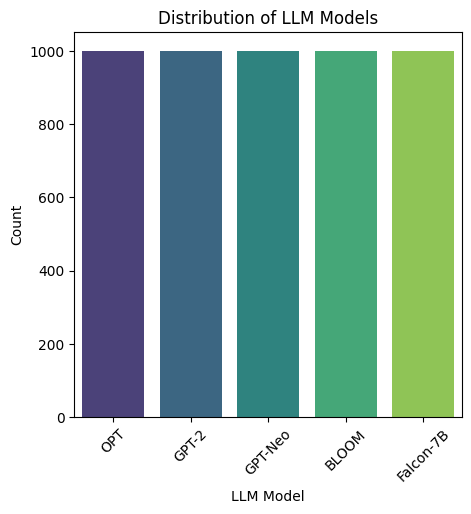

In [13]:
# Plot the distribution of the LLM models
plt.figure(figsize=(5, 5))
sns.countplot(data=consolidated_df, x='LLM_model', palette='viridis')
plt.title('Distribution of LLM Models')
plt.xlabel('LLM Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(os.path.join(output_dir, 'Distribution of Data LLM Models.png'))
plt.show()

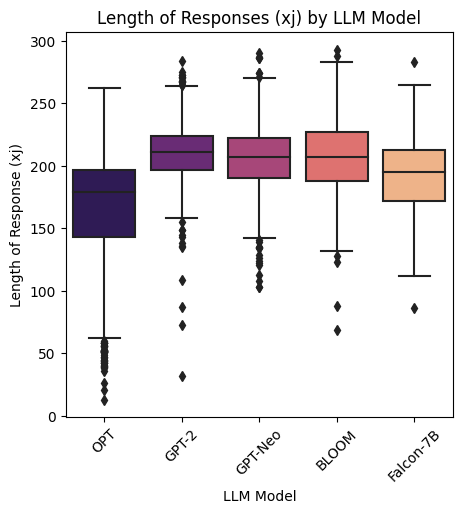

In [14]:
consolidated_df['xj_length'] = consolidated_df['xj'].apply(len)

# Plot the length of responses grouped by LLM Model
plt.figure(figsize=(5, 5))
sns.boxplot(data=consolidated_df, x='LLM_model', y='xj_length', palette='magma')
plt.title('Length of Responses (xj) by LLM Model')
plt.xlabel('LLM Model')
plt.ylabel('Length of Response (xj)')
plt.xticks(rotation=45)
plt.savefig(os.path.join(output_dir, 'Length of Responses (xj) by LLM Model.png'))
plt.show()


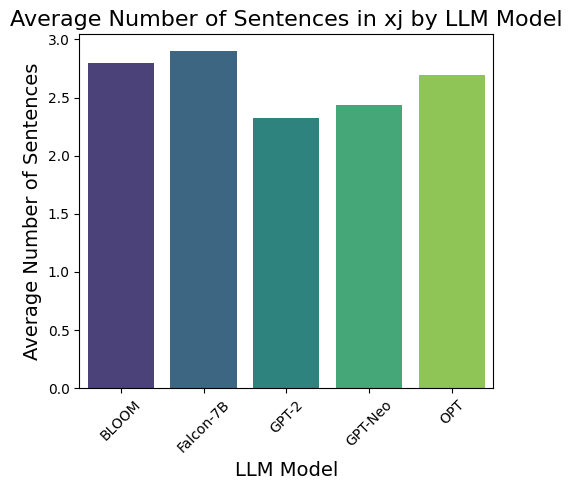

In [15]:
def count_sentences(text):
    return text.count('.') + text.count('!') + text.count('?')

consolidated_df['num_sentences'] = consolidated_df['xj'].apply(count_sentences)

average_sentences = consolidated_df.groupby('LLM_model')['num_sentences'].mean().reset_index()

average_sentences.columns = ['LLM_model', 'average_num_sentences']

# Plotting the average number of sentences
plt.figure(figsize=(5, 5))
sns.barplot(x='LLM_model', y='average_num_sentences', data=average_sentences, palette='viridis')
plt.title('Average Number of Sentences in xj by LLM Model', fontsize=16)
plt.xlabel('LLM Model', fontsize=14)
plt.ylabel('Average Number of Sentences', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Average Number of Sentences in xj by LLM Model.png'))
plt.show()


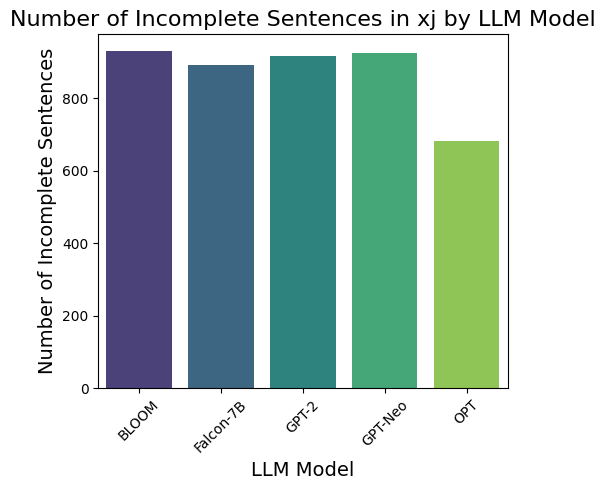

In [16]:
def is_incomplete_sentence(text):
    return not (text.endswith('.') or text.endswith('!') or text.endswith('?'))

consolidated_df['is_incomplete'] = consolidated_df['xj'].apply(is_incomplete_sentence)

incomplete_sentences_count = consolidated_df.groupby('LLM_model')['is_incomplete'].sum().reset_index()

incomplete_sentences_count.columns = ['LLM_model', 'incomplete_sentences_count']

# Plotting the number of incomplete sentences
plt.figure(figsize=(5, 5))
sns.barplot(x='LLM_model', y='incomplete_sentences_count', data=incomplete_sentences_count, palette='viridis')
plt.title('Number of Incomplete Sentences in xj by LLM Model', fontsize=16)
plt.xlabel('LLM Model', fontsize=14)
plt.ylabel('Number of Incomplete Sentences', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'Number of Incomplete Sentences in xj by LLM Model.png'))
plt.show()


# Preprocess Text and Find Word Frequencies by LLM Model

### if xi part is not removed from xj

In [17]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_word_frequencies(text_series):
    word_count = Counter()
    for text in text_series:
        words = text.lower().split()
        words = [word for word in words if word.isalpha() and word not in stop_words]
        word_count.update(words)
    return word_count

word_frequencies = {}
for model in consolidated_df['LLM_model'].unique():
    word_frequencies[model] = get_word_frequencies(consolidated_df[consolidated_df['LLM_model'] == model]['xj'])

print("\nTop words in GPT-2 generated text:", word_frequencies['GPT-2'].most_common(10))
print("\nTop words in OPT generated text:", word_frequencies['OPT'].most_common(10))
print("\nTop words in Falcon-7B generated text:", word_frequencies['Falcon-7B'].most_common(10))
print("\nTop words in BLOOM generated text:", word_frequencies['BLOOM'].most_common(10))
print("\nTop words in GPT-Neo generated text:", word_frequencies['GPT-Neo'].most_common(10))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

Top words in GPT-2 generated text: [('one', 152), ('like', 112), ('said', 108), ('two', 99), ('back', 99), ('looked', 98), ('could', 77), ('man', 76), ('people', 75), ('first', 73)]

Top words in OPT generated text: [('sure', 191), ('think', 152), ('man', 150), ('sun', 144), ('going', 134), ('new', 130), ('leaves', 111), ('door', 109), ('get', 97), ('small', 87)]

Top words in Falcon-7B generated text: [('sun', 201), ('going', 111), ('sure', 97), ('first', 88), ('looked', 85), ('get', 77), ('new', 74), ('wind', 73), ('two', 68), ('sky', 66)]

Top words in BLOOM generated text: [('man', 356), ('wind', 295), ('sun', 191), ('still', 175), ('shining', 156), ('blowing', 153), ('fire', 145), ('black', 132), ('looked', 128), ('able', 121)]

Top words in GPT-Neo generated text: [('like', 103), ('first', 98), ('one', 93), ('looked', 92), ('could', 89), ('man', 81), ('back

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/si

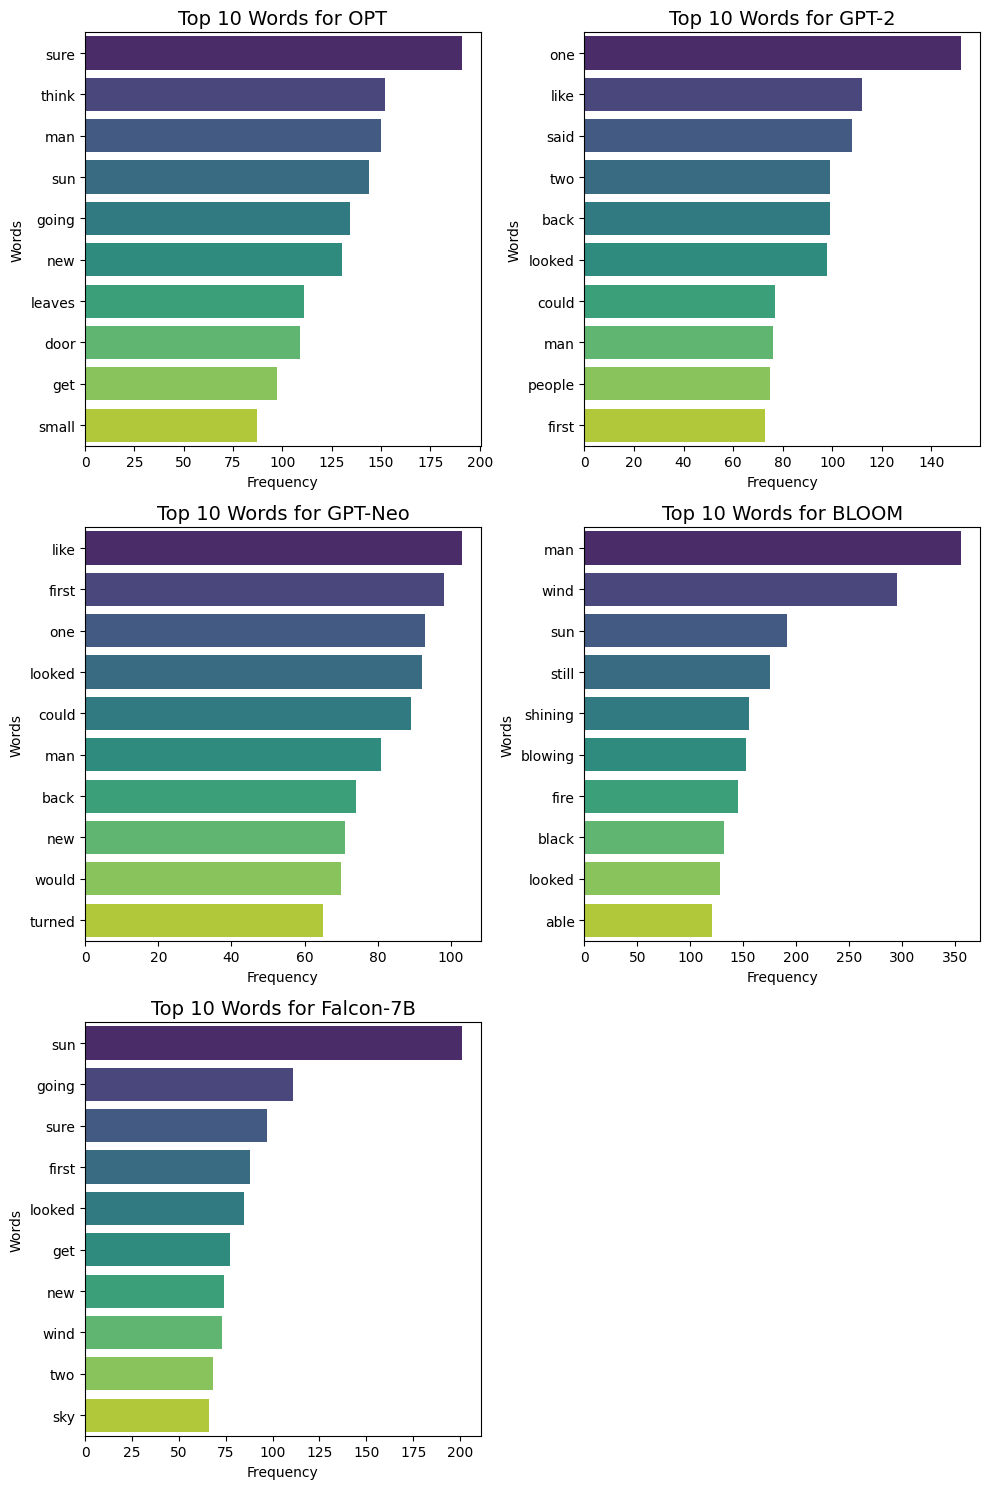

In [18]:
def plot_all_top_words_grid(top_n=10):
    num_models = len(word_frequencies)
    
    cols = 2  
    rows = np.ceil(num_models / cols).astype(int)  
    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))
    axes = axes.flatten()  
    for ax, (model, freqs) in zip(axes, word_frequencies.items()):
        top_words = freqs.most_common(top_n)
        words, counts = zip(*top_words)

        sns.barplot(x=list(counts), y=list(words), ax=ax, palette='viridis')
        ax.set_title(f'Top {top_n} Words for {model}', fontsize=14)
        ax.set_xlabel('Frequency')
        ax.set_ylabel('Words')

    for i in range(num_models, len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'top_words_grid(xi not removed).png'))
    plt.show()

plot_all_top_words_grid()


### If xi part is removed from xj

In [19]:
stop_words = set(stopwords.words('english'))

def get_word_frequencies_2(text_series, xi_series):
    word_count = Counter()
    for text, xi in zip(text_series, xi_series):
        text = text.replace(xi, '')
        words = text.lower().split()
        words = [word for word in words if word.isalpha() and word not in stop_words]
        word_count.update(words)
    return word_count

word_frequencies_2 = {}
for model in consolidated_df['LLM_model'].unique():
    model_df = consolidated_df[consolidated_df['LLM_model'] == model]
    word_frequencies_2[model] = get_word_frequencies_2(model_df['xj'], model_df['xi'])

print("\nTop words in GPT-2 generated text:", word_frequencies_2['GPT-2'].most_common(10))
print("\nTop words in OPT generated text:", word_frequencies_2['OPT'].most_common(10))
print("\nTop words in Falcon-7B generated text:", word_frequencies_2['Falcon-7B'].most_common(10))
print("\nTop words in BLOOM generated text:", word_frequencies_2['BLOOM'].most_common(10))
print("\nTop words in GPT-Neo generated text:", word_frequencies_2['GPT-Neo'].most_common(10))


Top words in GPT-2 generated text: [('one', 152), ('like', 112), ('said', 108), ('two', 99), ('back', 94), ('looked', 83), ('could', 77), ('man', 76), ('people', 75), ('first', 73)]

Top words in OPT generated text: [('sure', 191), ('think', 152), ('man', 149), ('going', 134), ('new', 130), ('sun', 128), ('get', 97), ('small', 87), ('first', 80), ('air', 68)]

Top words in Falcon-7B generated text: [('sun', 191), ('going', 111), ('sure', 97), ('first', 88), ('get', 77), ('new', 74), ('looked', 70), ('two', 68), ('sky', 66), ('wind', 63)]

Top words in BLOOM generated text: [('man', 355), ('wind', 285), ('sun', 181), ('still', 175), ('shining', 156), ('blowing', 153), ('black', 132), ('fire', 128), ('able', 121), ('two', 110)]

Top words in GPT-Neo generated text: [('like', 103), ('first', 98), ('one', 93), ('could', 89), ('man', 81), ('looked', 77), ('new', 71), ('would', 70), ('back', 69), ('see', 60)]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/si

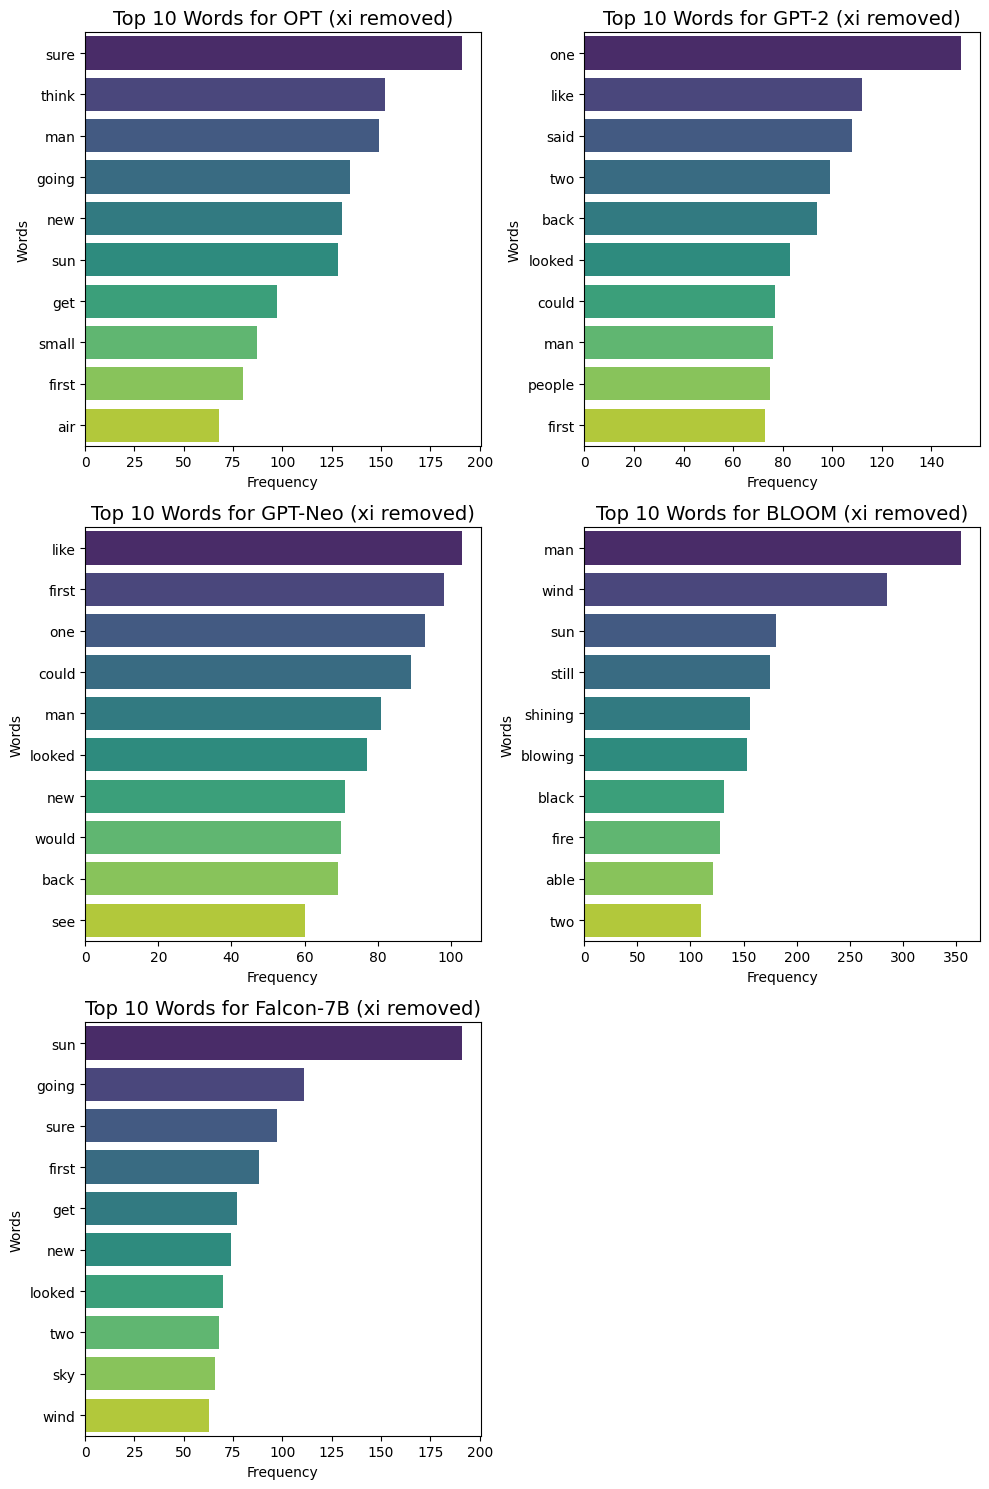

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_all_top_words_grid(top_n=10):
    num_models = len(word_frequencies_2)
    
    cols = 2  
    rows = np.ceil(num_models / cols).astype(int) 
    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 5 * rows))
    axes = axes.flatten()  
    for ax, (model, freqs) in zip(axes, word_frequencies_2.items()):
        top_words = freqs.most_common(top_n)
        words, counts = zip(*top_words)

        sns.barplot(x=list(counts), y=list(words), ax=ax, palette='viridis')
        ax.set_title(f'Top {top_n} Words for {model} (xi removed)', fontsize=14)
        ax.set_xlabel('Frequency')
        ax.set_ylabel('Words')

    for i in range(num_models, len(axes)):
        fig.delaxes(axes[i])
        
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'top_words_grid(xi removed).png'))
    plt.show()

plot_all_top_words_grid()


### Experiment Dataset

In [32]:
consolidated_df.tail(20)

,xi,xj,LLM_model,xj_length,num_sentences,is_incomplete,prompt_id
4985,With a waft,"With a waft of pungency, the smoke of the burn...",GPT-Neo,187,1,True,661
4986,With a waft,"With a waft of the hand, the “magic” of the “m...",Falcon-7B,132,2,True,661
4987,With a waft,"With a waft of nostalgia, I was reminded of th...",BLOOM,174,2,True,661
4988,With a waft,"With a waft of smoke, the fire department arri...",OPT,215,2,True,661
4989,With a waft,"With a wafted air, he opened his mouth to spea...",GPT-2,207,2,True,661
4990,With a wink,"With a wink and a nod, they went back to their...",GPT-2,170,3,True,662
4991,With a wink,"With a wink to the late Steve Jobs, the new Ap...",GPT-Neo,204,4,True,662
4992,With a wink,With a wink and a nod to the “I’m not a crook”...,Falcon-7B,186,0,True,662
4993,With a wink,"With a wink and a nod, the new president of th...",OPT,214,1,True,662
4994,With a wink,"With a wink at the man, the girl looked at him...",BLOOM,167,2,True,662


In [22]:
consolidated_df['prompt_id'] = consolidated_df.groupby('xi').ngroup() + 1  


In [24]:
consolidated_df.tail()

,xi,xj,LLM_model,xj_length,num_sentences,is_incomplete,prompt_id
5000,With applause,"With applause, the audience applauded the perf...",BLOOM,215,2,True,664
5001,With applause,"With applause, Trump says he's'very proud' of ...",OPT,220,0,True,664
5002,With applause,"With applause, he added; ""That is why I came i...",GPT-2,218,2,True,664
5003,With applause,"With applause and with huzzas, she rose and to...",GPT-Neo,195,2,True,664
5004,With applause,"With applause and cheers, the 2018-19 school y...",Falcon-7B,197,2,True,664


In [25]:
filtered_df = (consolidated_df.loc[consolidated_df.groupby(['prompt_id', 'LLM_model'])['num_sentences'].idxmax()]
               .reset_index(drop=True))
filtered_df.head(10)

,xi,xj,LLM_model,xj_length,num_sentences,is_incomplete,prompt_id
0,A sudden noise,A sudden noise in the background is a common p...,BLOOM,253,2,True,1
1,A sudden noise,"A sudden noise in the night, a strange light i...",Falcon-7B,216,2,True,1
2,A sudden noise,"A sudden noise, filled with smoke, echoed from...",GPT-2,234,2,False,1
3,A sudden noise,A sudden noise has roused me from sleep.\n\nA ...,GPT-Neo,172,4,True,1
4,A sudden noise,A sudden noise from the back of the house.\nI'...,OPT,159,4,False,1
5,Across the street,"Across the street, the police were on their wa...",BLOOM,215,4,True,2
6,Across the street,"Across the street from the beach, this 2 bedro...",Falcon-7B,201,2,True,2
7,Across the street,Across the street is the remains of the abando...,GPT-2,240,1,True,2
8,Across the street,"Across the street, in a two-story brick house,...",GPT-Neo,201,2,True,2
9,Across the street,"Across the street from the old library, there'...",OPT,136,3,False,2


In [27]:
filtered_df.tail(20)

,xi,xj,LLM_model,xj_length,num_sentences,is_incomplete,prompt_id
3330,With great effort,"With great effort, the authors have shown that...",BLOOM,238,0,True,667
3331,With great effort,"With great effort, I have managed to get my ha...",Falcon-7B,160,1,True,667
3332,With great effort,With great effort to make this project easy an...,GPT-2,242,1,True,667
3333,With great effort,"With great effort, the company was finally abl...",GPT-Neo,274,1,True,667
3334,With great effort,"With great effort, I can't get the image to lo...",OPT,164,3,True,667
3335,With trembling hands,"With trembling hands, the man\nstood up and lo...",BLOOM,183,3,True,668
3336,With trembling hands,"With trembling hands, I opened the envelope.\n...",Falcon-7B,165,6,True,668
3337,With trembling hands,"With trembling hands, she ran her eyes as she ...",GPT-2,220,2,True,668
3338,With trembling hands,With trembling hands. That is when I felt a li...,GPT-Neo,171,6,True,668
3339,With trembling hands,"With trembling hands, the man in the white shi...",OPT,137,3,True,668


In [33]:
filtered_df = consolidated_df.drop(columns=['xj_length', 'num_sentences', 'is_incomplete'])
filtered_df.tail(20)

,xi,xj,LLM_model,prompt_id
4985,With a waft,"With a waft of pungency, the smoke of the burn...",GPT-Neo,661
4986,With a waft,"With a waft of the hand, the “magic” of the “m...",Falcon-7B,661
4987,With a waft,"With a waft of nostalgia, I was reminded of th...",BLOOM,661
4988,With a waft,"With a waft of smoke, the fire department arri...",OPT,661
4989,With a waft,"With a wafted air, he opened his mouth to spea...",GPT-2,661
4990,With a wink,"With a wink and a nod, they went back to their...",GPT-2,662
4991,With a wink,"With a wink to the late Steve Jobs, the new Ap...",GPT-Neo,662
4992,With a wink,With a wink and a nod to the “I’m not a crook”...,Falcon-7B,662
4993,With a wink,"With a wink and a nod, the new president of th...",OPT,662
4994,With a wink,"With a wink at the man, the girl looked at him...",BLOOM,662


In [36]:
import re

def is_incomplete(sentence):
    return not sentence.strip().endswith(('.', '!', '?'))

def get_completed_sentences(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    
    while sentences and is_incomplete(sentences[-1]):
        sentences.pop()  
    return ' '.join(sentences) if sentences else text.strip()


def get_first_sentence(text):
    match = re.search(r'[.!?]', text)
    if match:
        return text[:match.end()]
    return text

In [37]:
# 1. xj without xi part
df1 = filtered_df.copy()
df1['xj'] = df1.apply(lambda row: row['xj'].replace(row['xi'], ''), axis=1)
df1.head()

,xi,xj,LLM_model,prompt_id
0,A sudden noise,"from the back of the house.\nI'm sorry, I'm n...",OPT,1
1,A sudden noise,", filled with smoke, echoed from the car's win...",GPT-2,1
2,A sudden noise,has roused me from sleep.\n\nA loud crash and...,GPT-Neo,1
3,A sudden noise,in the background is a common problem in the ...,BLOOM,1
4,A sudden noise,"in the night, a strange light in the sky, a m...",Falcon-7B,1


In [38]:
# 2. xj without xi part and limited to first sentence
df2 = df1.copy()
df2['xj'] = df2['xj'].apply(get_first_sentence)
df2.head()

,xi,xj,LLM_model,prompt_id
0,A sudden noise,from the back of the house.,OPT,1
1,A sudden noise,", filled with smoke, echoed from the car's win...",GPT-2,1
2,A sudden noise,has roused me from sleep.,GPT-Neo,1
3,A sudden noise,in the background is a common problem in the ...,BLOOM,1
4,A sudden noise,"in the night, a strange light in the sky, a m...",Falcon-7B,1


In [39]:
# 3. xj without xi part and only completed sentences
df3 = df1.copy()
df3['xj'] = df3['xj'].apply(get_completed_sentences)
df3.head(20)

,xi,xj,LLM_model,prompt_id
0,A sudden noise,"from the back of the house.\nI'm sorry, I'm n...",OPT,1
1,A sudden noise,", filled with smoke, echoed from the car's win...",GPT-2,1
2,A sudden noise,has roused me from sleep.\n\nA loud crash and ...,GPT-Neo,1
3,A sudden noise,in the background is a common problem in the ...,BLOOM,1
4,A sudden noise,"in the night, a strange light in the sky, a m...",Falcon-7B,1
5,Across the street,"from the beach, this 2 bedroom, 2 bath condo ...",Falcon-7B,2
6,Across the street,", the police were on their way to the scene. T...",BLOOM,2
7,Across the street,", in a two-story brick house, sat a woman in a...",GPT-Neo,2
8,Across the street,is the remains of the abandoned military base ...,GPT-2,2
9,Across the street,"from the old library, there's a little park w...",OPT,2


In [40]:
# 4. xj as is but limited to the first sentence
df4 = filtered_df.copy()
df4['xj'] = df4['xj'].apply(get_first_sentence)
df4.head(20)

,xi,xj,LLM_model,prompt_id
0,A sudden noise,A sudden noise from the back of the house.,OPT,1
1,A sudden noise,"A sudden noise, filled with smoke, echoed from...",GPT-2,1
2,A sudden noise,A sudden noise has roused me from sleep.,GPT-Neo,1
3,A sudden noise,A sudden noise in the background is a common p...,BLOOM,1
4,A sudden noise,"A sudden noise in the night, a strange light i...",Falcon-7B,1
5,Across the street,"Across the street from the beach, this 2 bedro...",Falcon-7B,2
6,Across the street,"Across the street, the police were on their wa...",BLOOM,2
7,Across the street,"Across the street, in a two-story brick house,...",GPT-Neo,2
8,Across the street,Across the street is the remains of the abando...,GPT-2,2
9,Across the street,"Across the street from the old library, there'...",OPT,2


In [41]:
# 5. xj as is but only completed sentences
df5 = filtered_df.copy()
df5['xj'] = df5['xj'].apply(get_completed_sentences)
df5.head(20)

,xi,xj,LLM_model,prompt_id
0,A sudden noise,A sudden noise from the back of the house.\nI'...,OPT,1
1,A sudden noise,"A sudden noise, filled with smoke, echoed from...",GPT-2,1
2,A sudden noise,A sudden noise has roused me from sleep.\n\nA ...,GPT-Neo,1
3,A sudden noise,A sudden noise in the background is a common p...,BLOOM,1
4,A sudden noise,"A sudden noise in the night, a strange light i...",Falcon-7B,1
5,Across the street,"Across the street from the beach, this 2 bedro...",Falcon-7B,2
6,Across the street,"Across the street, the police were on their wa...",BLOOM,2
7,Across the street,"Across the street, in a two-story brick house,...",GPT-Neo,2
8,Across the street,Across the street is the remains of the abando...,GPT-2,2
9,Across the street,"Across the street from the old library, there'...",OPT,2


In [43]:
# 6. POS-filtered version of xj with xi included
import spacy

nlp = spacy.load('en_core_web_sm')

def filter_pos(text, pos_tags=['NOUN', 'VERB']):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if token.pos_ in pos_tags]
    return ' '.join(filtered_tokens)

df_pos_filtered = filtered_df.copy()

df_pos_filtered['xj'] = df_pos_filtered['xj'].apply(lambda text: filter_pos(text, pos_tags=['NOUN', 'VERB']))

df_pos_filtered.head(10)


,xi,xj,LLM_model,prompt_id
0,A sudden noise,noise back house mean mean mean,OPT,1
1,A sudden noise,noise filled smoke echoed car windows pilot st...,GPT-2,1
2,A sudden noise,noise roused sleep crash hissing whistle follo...,GPT-Neo,1
3,A sudden noise,noise background problem field radar noise cau...,BLOOM,1
4,A sudden noise,noise night light sky figure lurking shadows t...,Falcon-7B,1
5,Across the street,street beach bedroom bath condo located heart ...,Falcon-7B,2
6,Across the street,street police way scene police way scene polic...,BLOOM,2
7,Across the street,street story brick house sat woman dress watch...,GPT-Neo,2
8,Across the street,street remains abandoned base man died soldier...,GPT-2,2
9,Across the street,street library 's park fountain place sit read...,OPT,2


In [44]:
# 6. POS-filtered version of xj with xi excluded
def filter_pos(text, pos_tags=['NOUN', 'VERB']):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if token.pos_ in pos_tags]
    return ' '.join(filtered_tokens)

df_pos_filtered_df1 = df1.copy()

df_pos_filtered_df1['xj'] = df_pos_filtered_df1['xj'].apply(lambda text: filter_pos(text, pos_tags=['NOUN', 'VERB']))

df_pos_filtered_df1.head(10)


,xi,xj,LLM_model,prompt_id
0,A sudden noise,back house mean mean mean,OPT,1
1,A sudden noise,filled smoke echoed car windows pilot startled...,GPT-2,1
2,A sudden noise,roused sleep crash hissing whistle followed cr...,GPT-Neo,1
3,A sudden noise,background problem field radar noise caused sc...,BLOOM,1
4,A sudden noise,night light sky figure lurking shadows things ...,Falcon-7B,1
5,Across the street,beach bedroom bath condo located heart action ...,Falcon-7B,2
6,Across the street,police way scene police way scene police way s...,BLOOM,2
7,Across the street,story brick house sat woman dress watching chi...,GPT-Neo,2
8,Across the street,remains abandoned base man died soldiers kille...,GPT-2,2
9,Across the street,library 's park fountain place sit read love f...,OPT,2


### Saving the filtered and experimented datasets along with the splits

In [45]:
from sklearn.model_selection import train_test_split

def split_and_save_data(df, model_name, output_dir, train_size=0.8, val_size=0.1, test_size=0.1):
    train_df, temp_df = train_test_split(
        df, 
        train_size=train_size, 
        stratify=df['LLM_model'], 
        random_state=69
    )
    
    val_df, test_df = train_test_split(
        temp_df, 
        test_size=test_size/(val_size + test_size), 
        stratify=temp_df['LLM_model'], 
        random_state=69
    )
    
    train_df.to_csv(os.path.join(output_dir, f'{model_name}_train.csv'), index=False)
    val_df.to_csv(os.path.join(output_dir, f'{model_name}_val.csv'), index=False)
    test_df.to_csv(os.path.join(output_dir, f'{model_name}_test.csv'), index=False)

output_dir = '/kaggle/working/datasets'
os.makedirs(output_dir, exist_ok=True)

dataframes = {
    'filtered_df': filtered_df,
    'xj_without_xi': df1,
    'xj_without_xi_first_sentence': df2,
    'xj_without_xi_completed_sentences': df3,
    'xj_first_sentence': df4,
    'xj_completed_sentences': df5,
    'xj_pos_filtered_with_xi': df_pos_filtered,
    'xj_pos_filtered_without_xi': df_pos_filtered_df1
}

for name, df in dataframes.items():
    split_and_save_data(df, name, output_dir)

print(f"All datasets have been split and saved in {output_dir}.")


All datasets have been split and saved in /kaggle/working/datasets.


### More Sophisticated Data Visulaization on Filtered data dataframe

In [46]:
output_dir_sop = '/kaggle/working/additional'
os.makedirs(output_dir_sop, exist_ok=True)

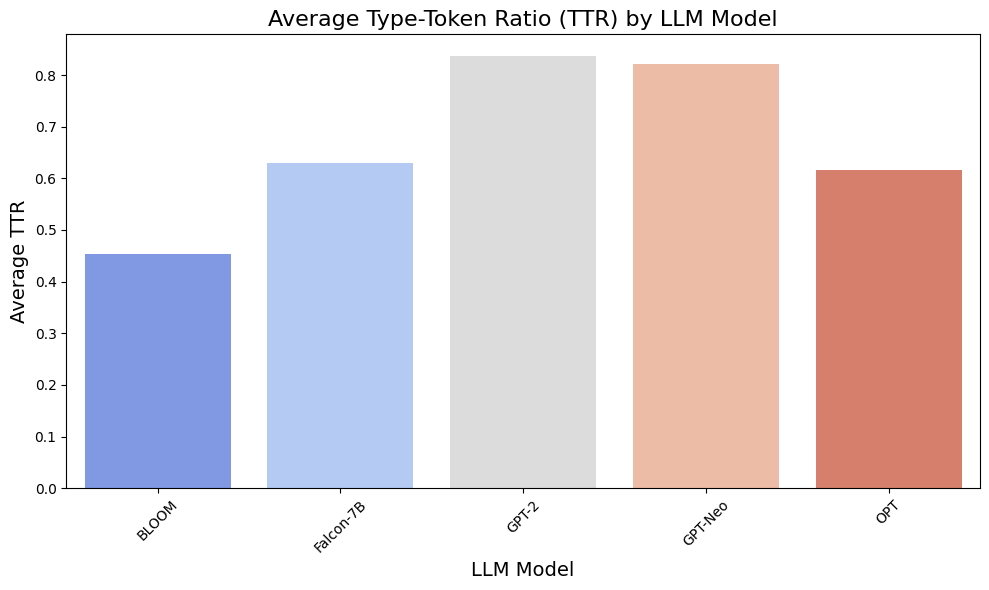

In [48]:
# Diversity of Vocabulary by LLM
# using Type-Token Ratio (TTR), which is the ratio of unique words (types) to total words (tokens).
def calculate_ttr(text):
    tokens = text.split()
    return len(set(tokens)) / len(tokens)

filtered_df['ttr'] = filtered_df['xj'].apply(calculate_ttr)

ttr_by_model = filtered_df.groupby('LLM_model')['ttr'].mean().reset_index()

# Plotting the TTR for each model
plt.figure(figsize=(10, 6))
sns.barplot(x='LLM_model', y='ttr', data=ttr_by_model, palette='coolwarm')
plt.title('Average Type-Token Ratio (TTR) by LLM Model', fontsize=16)
plt.xlabel('LLM Model', fontsize=14)
plt.ylabel('Average TTR', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir_sop, 'Average Type-Token Ratio (TTR) by LLM Model.png'))
plt.show()


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


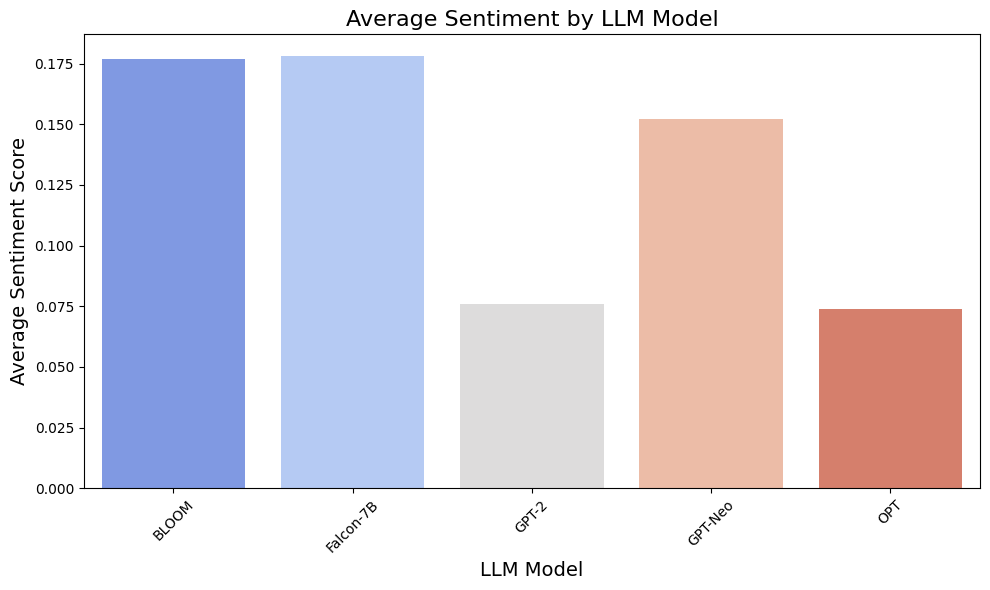

In [49]:
# Analyze the sentiment (positive, negative, neutral) of the texts generated by each LLM model.
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']  
filtered_df['sentiment'] = filtered_df['xj'].apply(get_sentiment)

sentiment_by_model = filtered_df.groupby('LLM_model')['sentiment'].mean().reset_index()

# Plotting sentiment by model
plt.figure(figsize=(10, 6))
sns.barplot(x='LLM_model', y='sentiment', data=sentiment_by_model, palette='coolwarm')
plt.title('Average Sentiment by LLM Model', fontsize=16)
plt.xlabel('LLM Model', fontsize=14)
plt.ylabel('Average Sentiment Score', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir_sop, 'Average Sentiment by LLM Model.png'))
plt.show()


In [50]:
#Using n-gram analysis to identify frequently repeated phrases (2-grams, 3-grams, etc.) in xj, to identify redundancy or overuse of certain phrases by different LLMs.
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=2, top_n=10):
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    X = vectorizer.fit_transform(corpus)
    ngram_counts = X.sum(axis=0).A1
    ngrams = vectorizer.get_feature_names_out()
    ngram_freq = dict(zip(ngrams, ngram_counts))
    return sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]

for model in filtered_df['LLM_model'].unique():
    print(f'Top 2-grams for {model}:')
    model_corpus = filtered_df[filtered_df['LLM_model'] == model]['xj'].tolist()
    top_ngrams = get_top_ngrams(model_corpus, n=2, top_n=5)
    print(top_ngrams)
    print()


Top 2-grams for OPT:
[('sun shining', 57), ('best best', 44), ('leaves grew', 44), ('crackled crackled', 40), ('grew leaves', 40)]

Top 2-grams for GPT-2:
[('looked like', 13), ('moon rose', 9), ('don know', 8), ('door opened', 8), ('sun set', 8)]

Top 2-grams for GPT-Neo:
[('crowd cheered', 14), ('new york', 13), ('cheered crowd', 12), ('united states', 12), ('looked like', 9)]

Top 2-grams for BLOOM:
[('wind blowing', 188), ('sun shining', 162), ('wearing black', 79), ('blowing direction', 69), ('stars shining', 52)]

Top 2-grams for Falcon-7B:
[('sun shone', 47), ('wind blew', 41), ('sun setting', 36), ('sun shining', 36), ('didn mean', 27)]



### Download Everything

In [55]:
!cd /kaggle/working

In [56]:
!ls


additional  datasets  figures


In [57]:
!zip -r file.zip /kaggle/working


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/figures/ (stored 0%)
  adding: kaggle/working/figures/Distribution of Data LLM Models.png (deflated 18%)
  adding: kaggle/working/figures/Average Number of Sentences in xj by LLM Model.png (deflated 13%)
  adding: kaggle/working/figures/Length of Responses (xj) by LLM Model.png (deflated 11%)
  adding: kaggle/working/figures/top_words_grid(xi not removed).png (deflated 22%)
  adding: kaggle/working/figures/Number of Incomplete Sentences in xj by LLM Model.png (deflated 13%)
  adding: kaggle/working/figures/top_words_grid(xi removed).png (deflated 21%)
  adding: kaggle/working/additional/ (stored 0%)
  adding: kaggle/working/additional/Average Sentiment by LLM Model.png (deflated 20%)
  adding: kaggle/working/additional/Average Type-Token Ratio (TTR) by LLM Model.png (deflated 21%)
  adding: kaggle/working/datasets/ (stored 0%)
  adding: kaggle/working/datasets/xj_pos_

In [58]:
!ls


additional  datasets  figures  file.zip


In [59]:
from IPython.display import FileLink
FileLink(r'file.zip')


/kaggle/working/file.zip